In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv('/kaggle/input/regressionmodel4/Housing.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [4]:
data['airconditioning'].head(10)

0    yes
1    yes
2     no
3    yes
4    yes
5    yes
6    yes
7     no
8    yes
9    yes
Name: airconditioning, dtype: object

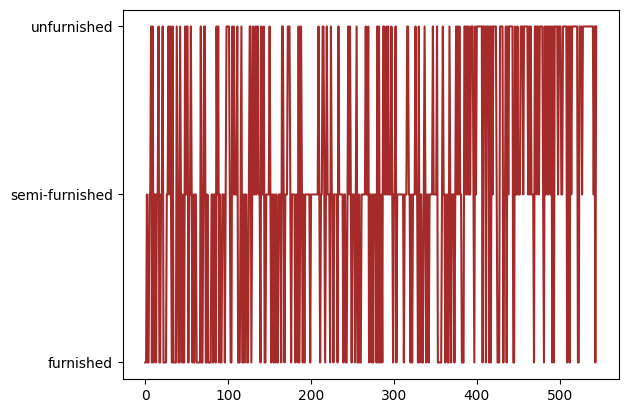

In [5]:
plt.plot(data['furnishingstatus'],color = 'brown')

In [12]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Assume 'data' is your DataFrame
Y = data['price']

# Convert all non-numeric columns to dummy/indicator variables
X = data.drop(columns=['price'])
X = pd.get_dummies(X, drop_first=True)

# Now scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(data=X_scaled, columns=X.columns)

X_scaled.head()

,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,1.046726,1.403419,1.421812,1.378217,1.517692,0.405623,-0.465315,-0.734539,-0.219265,1.472618,1.804941,-0.844888,-0.696429
1,1.757010,1.403419,5.405809,2.532024,2.679409,0.405623,-0.465315,-0.734539,-0.219265,1.472618,-0.554035,-0.844888,-0.696429
2,2.218232,0.047278,1.421812,0.224410,1.517692,0.405623,-0.465315,1.361397,-0.219265,-0.679063,1.804941,1.183588,-0.696429
3,1.083624,1.403419,1.421812,0.224410,2.679409,0.405623,-0.465315,1.361397,-0.219265,1.472618,1.804941,-0.844888,-0.696429
4,1.046726,1.403419,-0.570187,0.224410,1.517692,0.405623,2.149083,1.361397,-0.219265,1.472618,-0.554035,-0.844888,-0.696429


In [13]:
X.corr()

,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
area,1.000000,0.151858,0.193820,0.083996,0.352980,0.288874,0.140297,0.047417,-0.009229,0.222393,0.234779,0.006156,-0.142278
bedrooms,0.151858,1.000000,0.373930,0.408564,0.139270,-0.012033,0.080549,0.097312,0.046049,0.160603,0.079023,0.050040,-0.126252
bathrooms,0.193820,0.373930,1.000000,0.326165,0.177496,0.042398,0.126469,0.102106,0.067159,0.186915,0.063472,0.029834,-0.132107
stories,0.083996,0.408564,0.326165,1.000000,0.045547,0.121706,0.043538,-0.172394,0.018847,0.293602,0.044425,-0.003648,-0.082972
parking,0.352980,0.139270,0.177496,0.045547,1.000000,0.204433,0.037466,0.051497,0.067864,0.159173,0.091627,0.041327,-0.165705
mainroad_yes,0.288874,-0.012033,0.042398,0.121706,0.204433,1.000000,0.092337,0.044002,-0.011781,0.105423,0.199876,0.011450,-0.133123
guestroom_yes,0.140297,0.080549,0.126469,0.043538,0.037466,0.092337,1.000000,0.372066,-0.010308,0.138179,0.160897,0.005821,-0.099023
basement_yes,0.047417,0.097312,0.102106,-0.172394,0.051497,0.044002,0.372066,1.000000,0.004385,0.047341,0.228083,0.050284,-0.117935
hotwaterheating_yes,-0.009229,0.046049,0.067159,0.018847,0.067864,-0.011781,-0.010308,0.004385,1.000000,-0.130023,-0.059411,0.063819,-0.059194
airconditioning_yes,0.222393,0.160603,0.186915,0.293602,0.159173,0.105423,0.138179,0.047341,-0.130023,1.000000,0.117382,-0.053179,-0.094086


In [17]:
K = X.corr()

calculating the variance inflation function

In [27]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = X

In [30]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# If you haven't already, convert all categorical columns to dummies
vif_data_numeric = pd.get_dummies(vif_data, drop_first=True)

# If you have boolean columns, convert them too
for col in vif_data_numeric.select_dtypes(include='bool').columns:
    vif_data_numeric[col] = vif_data_numeric[col].astype(int)

# Now calculate VIF
vif = pd.Series(
    [variance_inflation_factor(vif_data_numeric.values, i) for i in range(vif_data_numeric.shape[1])],
    index=vif_data_numeric.columns
)
print(vif)

area                                8.276447
bedrooms                           16.652387
bathrooms                           9.417643
stories                             7.880730
parking                             1.986400
mainroad_yes                        6.884806
guestroom_yes                       1.473234
basement_yes                        2.019858
hotwaterheating_yes                 1.091568
airconditioning_yes                 1.767753
prefarea_yes                        1.494211
furnishingstatus_semi-furnished     2.386831
furnishingstatus_unfurnished        2.008632
dtype: float64


In [31]:
vif[vif == vif.max()].index[0]

'bedrooms'

In [59]:
import numpy as np
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor


for col in vif_data.select_dtypes(include='bool').columns:
    vif_data[col] = vif_data[col].astype(int)
# Convert categorical columns to dummies
vif_data = pd.get_dummies(vif_data, drop_first=True)
# Handle NaN/Inf values
vif_data = vif_data.fillna(0)
vif_data = vif_data.replace([np.inf, -np.inf], 0)

def mc_remover(data):
    if data.shape[1] < 2:
        print("Not enough columns to calculate VIF.")
        return data
    vif = pd.Series(
        [variance_inflation_factor(data.values, i) for i in range(data.shape[1])],
        index=data.columns
    )
    if vif.max() > 5:
        col_to_remove = vif.idxmax()
        print(f"{col_to_remove} has been removed")
        data = data.drop(columns=[col_to_remove])
        return data
    else:
        print('No multicollinearity present anymore')
        return data

vif = vif_data.copy()
for i in range(7):
    if vif.shape[1] < 2:
        print("Stopping: not enough columns to proceed.")
        break
    vif = mc_remover(vif)
print(vif.head())

bedrooms has been removed
bathrooms has been removed
area has been removed
mainroad_yes has been removed
No multicollinearity present anymore
No multicollinearity present anymore
No multicollinearity present anymore
   stories  parking  guestroom_yes  basement_yes  hotwaterheating_yes  \
0        3        2              0             0                    0   
1        4        3              0             0                    0   
2        2        2              0             1                    0   
3        2        3              0             1                    0   
4        2        2              1             1                    0   

   airconditioning_yes  prefarea_yes  furnishingstatus_semi-furnished  \
0                    1             1                                0   
1                    1             0                                0   
2                    0             1                                1   
3                    1             1                 

In [60]:
X = vif_data
Y = data['price']

In [61]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=101)
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((381, 13), (164, 13), (381,), (164,))

In [67]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr = LinearRegression()
lr.fit(X_train_scaled, Y_train)

LinearRegression()

In [70]:
lr.coef_

array([ 2.65874665e+02,  9.86332352e+04,  9.54981282e+05,  4.67240429e+05,
        2.92327455e+05,  4.20306961e+05,  8.28078529e+04,  4.09406020e+05,
        1.00245307e+06,  8.37102835e+05,  7.10539910e+05,  2.48415292e+04,
       -4.39250397e+05])

In [72]:
predictions = lr.predict(X_test)
lr.score(X_test,Y_test)

0.6125155560404941

In [77]:
residuals = predictions - Y_test
residual_table = pd.DataFrame({'residuals':residuals,'predictions':predictions})
residual_table = residual_table.sort_values(by = 'predictions')

In [80]:
k = [0 for i in range(int(residual_table['predictions'].max()))] 

In [85]:
z = [i for i in range(int(residual_table['predictions'].max()))]

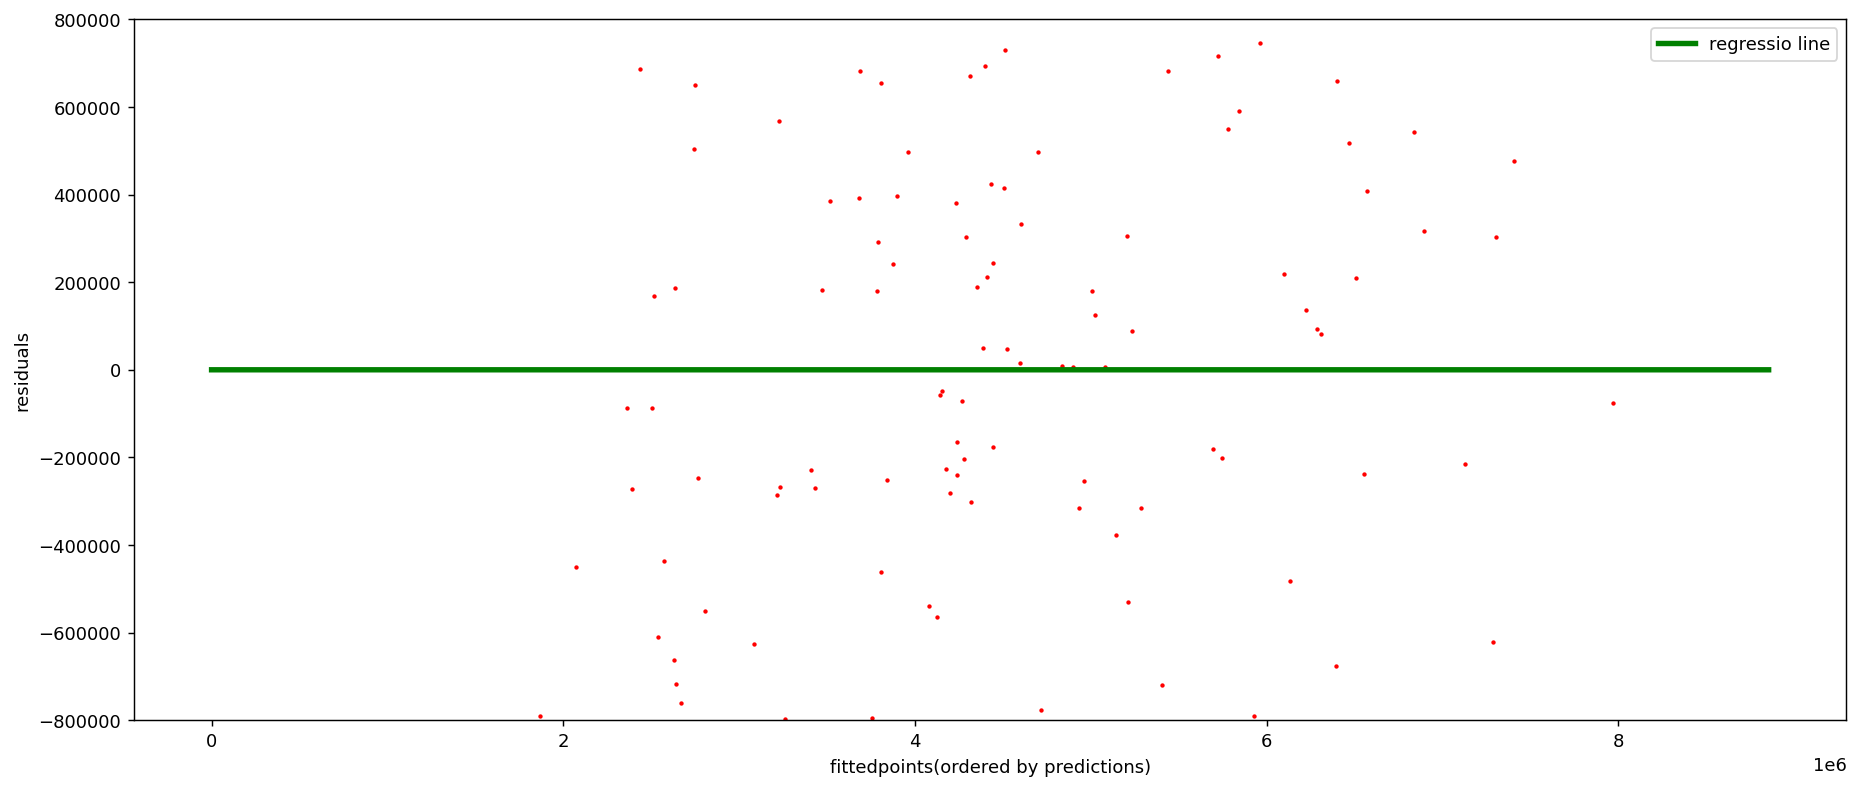

In [86]:
plt.figure(dpi=130,figsize=(17,7))
plt.scatter(residual_table['predictions'],residual_table['residuals'],color='red',s=2)
plt.plot(z,k,color ='green',linewidth=3,label='regressio line')
plt.ylim(-800000,800000)
plt.xlabel('fittedpoints(ordered by predictions)')
plt.ylabel('residuals')
plt.legend()
plt.show()

In [89]:
sum(data.isnull().sum())

0

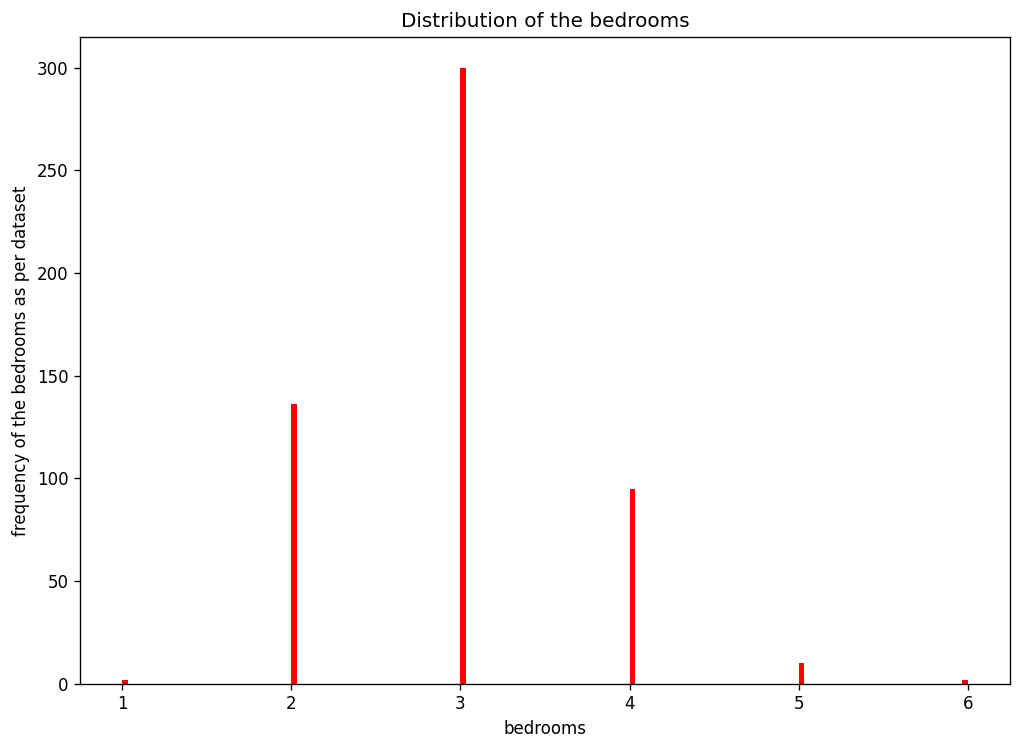

In [94]:
plt.figure(figsize=(10,7),dpi = 120)
plt.hist(data['bedrooms'],bins=150,color='red')
plt.xlabel('bedrooms')
plt.ylabel('frequency of the bedrooms as per dataset')
plt.title('Distribution of the bedrooms')
plt.show()

In [98]:
def log_transform(sample_data):
    return np.log(sample_data)

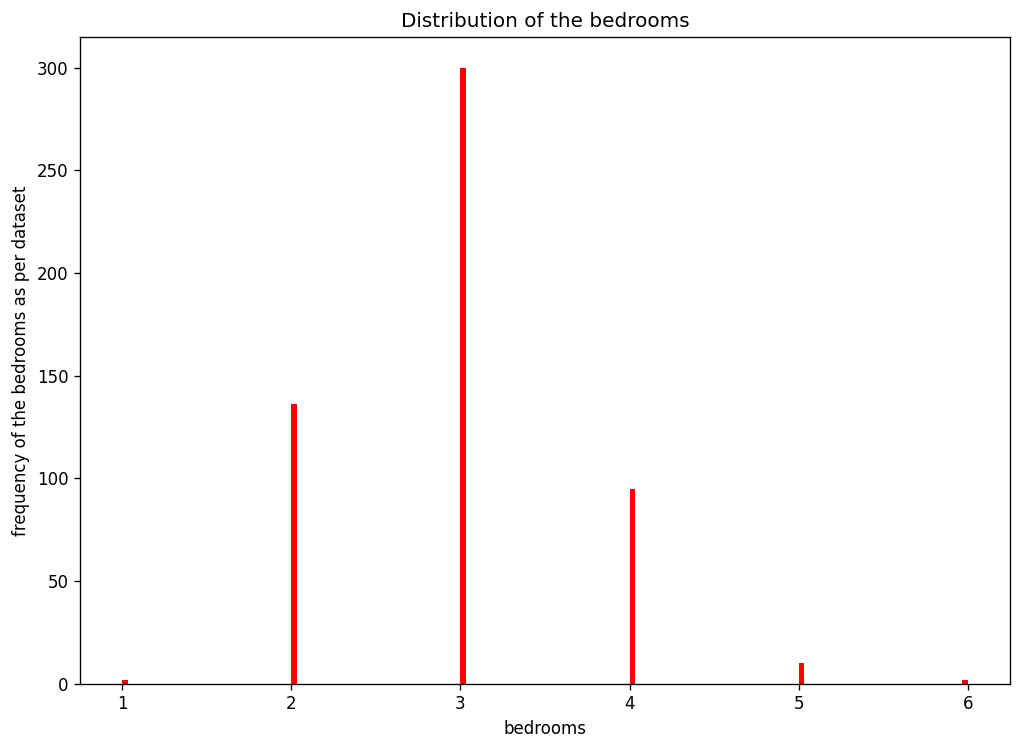

In [100]:
plt.figure(figsize=(10,7),dpi = 120)
plt.hist(data['bedrooms'],bins=150,color='red')
plt.xlabel('bedrooms')
plt.ylabel('frequency of the bedrooms as per dataset')
plt.title('Distribution of the bedrooms')
plt.show()

In [102]:
label_encoded = data['furnishingstatus']
label_encoded.value_counts()

furnishingstatus
semi-furnished    227
unfurnished       178
furnished         140
Name: count, dtype: int64

In [103]:
label_encoded = label_encoded.map({'semi-furnished':1,
                                   'unfurnished':2,
                                   'furnished':3})

In [104]:
label_encoded.value_counts()

furnishingstatus
1    227
2    178
3    140
Name: count, dtype: int64